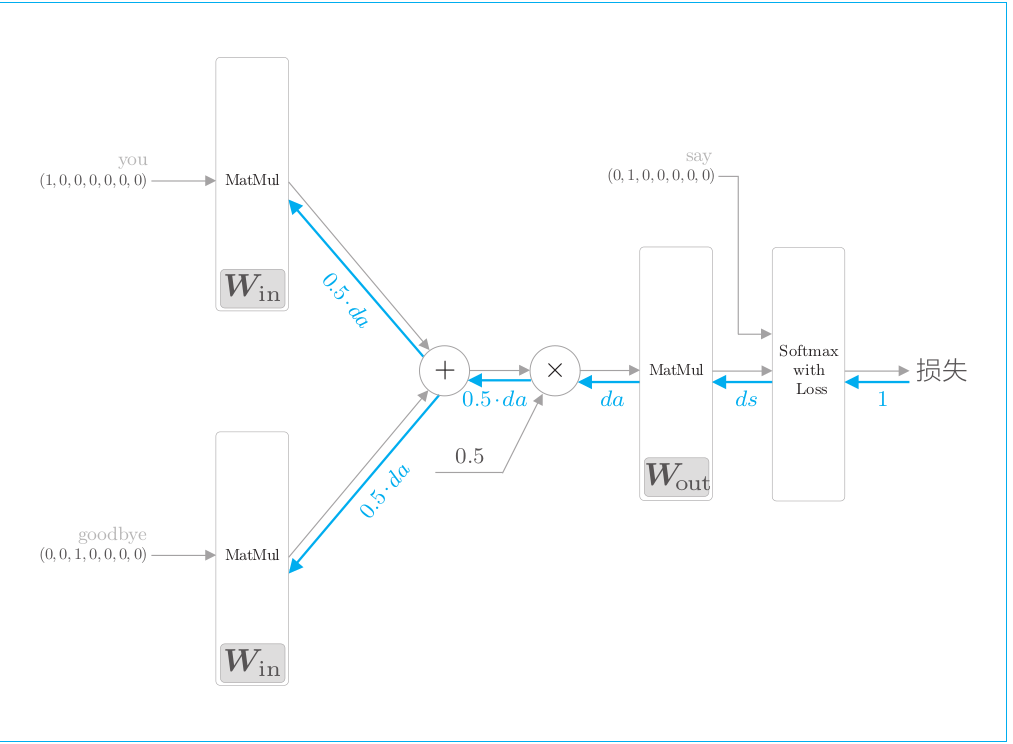

importing Jupyter notebook from ../common/layers.ipynb
importing Jupyter notebook from ../common/functions.ipynb
importing Jupyter notebook from ../common/util.ipynb
[0 1 2 3 4 1 5 6]
{'you': 0, 'say': 1, 'goodbye': 2, 'and': 3, 'i': 4, 'hello': 5, '.': 6}
{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}
[[0 1 0 0 0 0 0]
 [1 0 1 0 1 1 0]
 [0 1 0 1 0 0 0]
 [0 0 1 0 1 0 0]
 [0 1 0 1 0 0 0]
 [0 1 0 0 0 0 1]
 [0 0 0 0 0 1 0]]
0.7071067691154799

[query] you
 goodbye: 0.7071067691154799
 i: 0.7071067691154799
 hello: 0.7071067691154799
 say: 0.0
 and: 0.0
covariance matrix
[[0 1 0 0 0 0 0]
 [1 0 1 0 1 1 0]
 [0 1 0 1 0 0 0]
 [0 0 1 0 1 0 0]
 [0 1 0 1 0 0 0]
 [0 1 0 0 0 0 1]
 [0 0 0 0 0 1 0]]
--------------------------------------------------
PPMI
[[0.    1.807 0.    0.    0.    0.    0.   ]
 [1.807 0.    0.807 0.    0.807 0.807 0.   ]
 [0.    0.807 0.    1.807 0.    0.    0.   ]
 [0.    0.    1.807 0.    1.807 0.    0.   ]
 [0.    0.807 0.    1.807 0.    0.    0.   ]


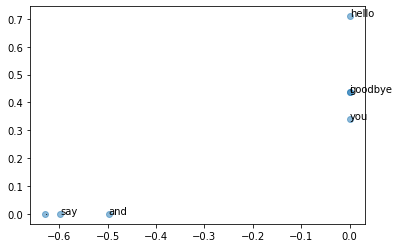

[0 1 2 3 4 1 5 6]
[[0 2]
 [1 3]
 [2 4]
 [3 1]
 [4 5]
 [1 6]]
[1 2 3 4 1 5]


target_one_hot:
[[0 1 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 0 1 0 0]
 [0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0]]


contexts_one_hot:
[[[1 0 0 0 0 0 0]
  [0 0 1 0 0 0 0]]

 [[0 1 0 0 0 0 0]
  [0 0 0 1 0 0 0]]

 [[0 0 1 0 0 0 0]
  [0 0 0 0 1 0 0]]

 [[0 0 0 1 0 0 0]
  [0 1 0 0 0 0 0]]

 [[0 0 0 0 1 0 0]
  [0 0 0 0 0 1 0]]

 [[0 1 0 0 0 0 0]
  [0 0 0 0 0 0 1]]]


In [1]:
import sys
sys.path.append('..')
import numpy as np
import import_ipynb
from common.layers import MatMul, SoftmaxWithLoss
from common.util import *

In [2]:
corpus, word_to_id, id_to_word = preprocess("You say goodbye and I say hello.")
print(corpus)
contexts, target = create_contexts_target(corpus)
print(contexts)
# target 本质是取list第二个到倒数第二个，主要是context要取3位窗口的subList，但要排除中间元素
print(target)

vocab_size = len(word_to_id)
target_one_hot = convert_one_hot(target, vocab_size)
contexts_one_hot = convert_one_hot(contexts, vocab_size)

print("\n")
print('target_one_hot:')
print(target_one_hot)
print("\n")
print('contexts_one_hot:')
print(contexts_one_hot)

print("\n")
print('contexts_one_hot[:, 0]:')
print(contexts_one_hot[:, 0])

print("\n")
print('contexts_one_hot[:, 1]:')
print(contexts_one_hot[:, 1])

[0 1 2 3 4 1 5 6]
[[0 2]
 [1 3]
 [2 4]
 [3 1]
 [4 5]
 [1 6]]
[1 2 3 4 1 5]


target_one_hot:
[[0 1 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 0 1 0 0]
 [0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0]]


contexts_one_hot:
[[[1 0 0 0 0 0 0]
  [0 0 1 0 0 0 0]]

 [[0 1 0 0 0 0 0]
  [0 0 0 1 0 0 0]]

 [[0 0 1 0 0 0 0]
  [0 0 0 0 1 0 0]]

 [[0 0 0 1 0 0 0]
  [0 1 0 0 0 0 0]]

 [[0 0 0 0 1 0 0]
  [0 0 0 0 0 1 0]]

 [[0 1 0 0 0 0 0]
  [0 0 0 0 0 0 1]]]


contexts_one_hot[:, 0]:
[[1 0 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 0 1 0 0]
 [0 1 0 0 0 0 0]]


contexts_one_hot[:, 1]:
[[0 0 1 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 0 1 0 0]
 [0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0]
 [0 0 0 0 0 0 1]]


In [3]:
class SimpleCBOW:
    def __init__(self, vocab_size, hidden_size):
        V, H = vocab_size, hidden_size

        # 初始化权重
        W_in = 0.01 * np.random.randn(V, H).astype('f')
        W_out = 0.01 * np.random.randn(H, V).astype('f')

        # 生成层
        self.in_layer0 = MatMul(W_in)
        self.in_layer1 = MatMul(W_in)
        self.out_layer = MatMul(W_out)
        self.loss_layer = SoftmaxWithLoss()

        # 将所有的权重和梯度整理到列表中
        layers = [self.in_layer0, self.in_layer1, self.out_layer]
        self.params, self.grads = [], []
        for layer in layers:
            # 多个相同的权重会在optimzer中去重
            self.params += layer.params
            self.grads += layer.grads

        # 将单词的分布式表示设置为成员变量
        self.word_vecs = W_in
        
    def forward(self, contexts, target):
        # context shape: (6,2,7)
        # contexts[:, 0]表示左边的词
        # contexts[:, 1]表示右边的词
        # 目标是计算中间词的分数
        h0 = self.in_layer0.forward(contexts[:, 0])
        h1 = self.in_layer1.forward(contexts[:, 1])
        h = (h0 + h1) * 0.5
        score = self.out_layer.forward(h)
        loss = self.loss_layer.forward(score, target)
        return loss
    
    def backward(self, dout=1):
        ds = self.loss_layer.backward(dout)
        da = self.out_layer.backward(ds)
        da *= 0.5
        self.in_layer1.backward(da)
        self.in_layer0.backward(da)
        return None

In [4]:
# coding: utf-8
# train the CBOW model

import sys
sys.path.append('..')  # 为了引入父目录的文件而进行的设定
import import_ipynb
from common.trainer import Trainer
from common.optimizer import Adam
from common.util import preprocess, create_contexts_target, convert_one_hot
import numpy as np

importing Jupyter notebook from ../common/trainer.ipynb
importing Jupyter notebook from ../common/optimizer.ipynb


| epoch 1 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 2 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 3 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 4 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 5 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 6 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 7 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 8 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 9 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 10 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 11 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 12 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 13 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 14 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 15 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 16 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 17 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 18 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 19 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 20 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 21 |  iter 1 / 2 | ti

| epoch 388 |  iter 1 / 2 | time 0[s] | loss 0.87
| epoch 389 |  iter 1 / 2 | time 0[s] | loss 1.09
| epoch 390 |  iter 1 / 2 | time 0[s] | loss 0.97
| epoch 391 |  iter 1 / 2 | time 0[s] | loss 0.88
| epoch 392 |  iter 1 / 2 | time 0[s] | loss 1.08
| epoch 393 |  iter 1 / 2 | time 0[s] | loss 1.08
| epoch 394 |  iter 1 / 2 | time 0[s] | loss 0.77
| epoch 395 |  iter 1 / 2 | time 0[s] | loss 1.18
| epoch 396 |  iter 1 / 2 | time 0[s] | loss 0.88
| epoch 397 |  iter 1 / 2 | time 0[s] | loss 0.97
| epoch 398 |  iter 1 / 2 | time 0[s] | loss 1.09
| epoch 399 |  iter 1 / 2 | time 0[s] | loss 0.86
| epoch 400 |  iter 1 / 2 | time 0[s] | loss 0.95
| epoch 401 |  iter 1 / 2 | time 0[s] | loss 1.09
| epoch 402 |  iter 1 / 2 | time 0[s] | loss 0.99
| epoch 403 |  iter 1 / 2 | time 0[s] | loss 0.85
| epoch 404 |  iter 1 / 2 | time 0[s] | loss 0.97
| epoch 405 |  iter 1 / 2 | time 0[s] | loss 1.07
| epoch 406 |  iter 1 / 2 | time 0[s] | loss 0.86
| epoch 407 |  iter 1 / 2 | time 0[s] | loss 1.08


| epoch 760 |  iter 1 / 2 | time 0[s] | loss 0.92
| epoch 761 |  iter 1 / 2 | time 0[s] | loss 0.56
| epoch 762 |  iter 1 / 2 | time 0[s] | loss 0.65
| epoch 763 |  iter 1 / 2 | time 0[s] | loss 0.85
| epoch 764 |  iter 1 / 2 | time 0[s] | loss 0.71
| epoch 765 |  iter 1 / 2 | time 0[s] | loss 0.68
| epoch 766 |  iter 1 / 2 | time 0[s] | loss 0.63
| epoch 767 |  iter 1 / 2 | time 0[s] | loss 0.76
| epoch 768 |  iter 1 / 2 | time 0[s] | loss 0.80
| epoch 769 |  iter 1 / 2 | time 0[s] | loss 0.56
| epoch 770 |  iter 1 / 2 | time 0[s] | loss 0.85
| epoch 771 |  iter 1 / 2 | time 0[s] | loss 0.80
| epoch 772 |  iter 1 / 2 | time 0[s] | loss 0.57
| epoch 773 |  iter 1 / 2 | time 0[s] | loss 0.62
| epoch 774 |  iter 1 / 2 | time 0[s] | loss 0.77
| epoch 775 |  iter 1 / 2 | time 0[s] | loss 0.57
| epoch 776 |  iter 1 / 2 | time 0[s] | loss 0.87
| epoch 777 |  iter 1 / 2 | time 0[s] | loss 0.68
| epoch 778 |  iter 1 / 2 | time 0[s] | loss 0.65
| epoch 779 |  iter 1 / 2 | time 0[s] | loss 0.84


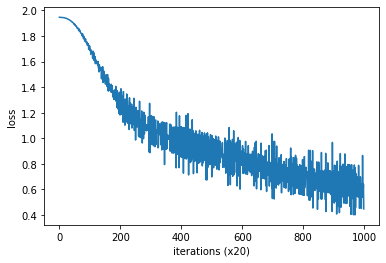

you [-1.196 -1.199 -1.17  -1.162  1.19 ]
say [ 1.214  1.233  1.219  1.242 -0.628]
goodbye [-0.707 -0.699 -0.779 -0.747  0.933]
and [ 0.752  0.809  0.803  0.895 -2.036]
i [-0.71  -0.704 -0.777 -0.758  0.947]
hello [-1.2   -1.196 -1.189 -1.161  1.195]
. [1.311 1.285 1.29  1.287 1.606]


In [5]:
window_size = 1
hidden_size = 5
batch_size = 3
max_epoch = 1000

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

vocab_size = len(word_to_id)
contexts, target = create_contexts_target(corpus, window_size)
target = convert_one_hot(target, vocab_size)
contexts = convert_one_hot(contexts, vocab_size)

model = SimpleCBOW(vocab_size, hidden_size)
optimizer = Adam()
trainer = Trainer(model, optimizer)

trainer.fit(contexts, target, max_epoch, batch_size)
trainer.plot()

# 单词的分布式表示。这样的分布式表示能够很好地捕获单词含义
理由相信,这样的分布式表示能够很好地捕获单词含义。
word_vecs = model.word_vecs
for word_id, word in id_to_word.items():
    print(word, word_vecs[word_id])
